<a href="https://colab.research.google.com/github/Angelgz011/estadistica2/blob/main/eii_u1_p_22150429.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTITUTO TECNOLÓGICO DE AGUASCALIENTES

INGENIERÍA EN GESTIÓN EMPRESARIAL

ESTADISTICA INFERENCIAL II

Alumno: Angel Josué Gamboa Zamora

Docente: José Cruz Muñoz Esparza

Num de control: 22150429

15/03/2025

# INTRODUCCIÓN
En el presente trabajo se hará uso de los conocimientos adquiridos en la materia de Estadistica Inferencial II. Utilizando una base de datos a la que podamos aplicarle pruebas de correlación como lo son el coeficiente de correlación y determinación, así como un gráfico de disperción donde se podrá apreciar de manera visual los resultados de las pruebas.
Adjunto a estas pruebas se presenta una hipotesis sobre los datos, además del Marco teórico y Métodología.

# Hipótesis


La hipotesis nula H0 = "No existe una realación significativa entre el nivel de oxigeno en sangre y el ritmo cardiaco"

Hipotesis Alternativa = "Existe una correlación positiva sin razón específica"



# Marco Teórico
El uso de smartwatches para el monitoreo de la salud ha facilitado la recolección de datos en tiempo real, permitiendonos analizar la relación entre la frecuencia cardiaca y los niveles de oxigeno en sangre.

La frecuencia cardiaca es un indicador cardiovascular que varría con la actividad física y el estado de salud. Un nivel normal en reposo varía entre 60 y 100 lpm en adultos.

El oxigeno en sangre mide la cantidad de oxigeno trasportado por la hemoglobina. Los niveles normales estan entre 95% y 100% y niveles debajo  del 90% pueden indicar hipoxemia.

En general, la relación entre estas dos variables es negativa, dado que una saturación de oxigeno disminuye la frecuencia cardiaca y viceversa. Sin embargo el ejercicio o enfermedades respiratorias pueden modificar esta relación.



# Metodología
Comenzamos por tomar dos variables de nuestra base de datos. Donde

Y = Heart Rate (BPM)

X = Blood Oxygen Level (%)

Cuyos datos usaremos para trazar un diagrama de disperción donde se pueda visualizar y darnos una primera impresión sobre su relación.





Para la recopilación de estos datos se utilizó una base de datos de salud que recopila datos a partir de smartwatch.

Después de filtrar los datos con una linea de código para garantizar que no hubiera errores se generó un gráfico de dispersión que nos permitiera identificar posibles patrones.

Se hace uso de un modelo estadistico de regresión lineal con ayuda de la biblioteca statsmodels con los que podemos evaluar la realción entre las variables.

Para estimar la ecuación de la recta de regresón:

Y = b0 + b1X

Donde y es el nivel de oxigeno en sangre

X es la frecuencia cardiaca

b0 es el intercepto

B1 es la regresión

Se calcula b1 y b0 del modelo y se traza la recta de regresión sobre el gráfico de dispersión.


Para la prueba de correlación de Pearson se utiliza la librería scipy.stats.pearsonr(), obteniendo un coeficiente de correlación bajo.
Además de calcular el coeficiente de determinación con la formula:
r^2= r x r


Se determinó un intervalo de vonfianza del 95% para b1 donde se encontró que el intervalo contenía el valor 0, indicando una pendiente estimada no significativa.

Para el analisis de los supuestos del Modelo se evalúan:

Linealidad: Por medio del gráfico de dispersión.

Normalidad: Por medio de la distribución de residuales.

Homocedasticidad: Desdcartandose por la observación de heterocedasticidad en los residuales, indicando el incumplimiento de este supuesto.





# RESULTADOS
Despuesde realizar las diferentes pruebas, el analisis de correlación seún el coeficiente obtenido de -0.0142 concluimos que indica una relación negativa muy debil entre ambas variables. Lo que respalda la hipotesis nula (H0). De igual forma el coeficiente de determiniación de 0.0002 implica que no hay cantidad de variabilidad significativa que pueda explicarse por los datos, confirmando que la relación entre las variables es ínfima.

En el intervalo de confianza encontramos que incluye el 0, por lo que el modelo de regresión no es significativo y se respalda una vez más la hipotesis nula.

Para el analisis de gráficos podemos concluir que:

Se rechaza el supuesto de linealidad pues no se observa una tendencia clara en los residuales.

La distribución es irregular y dispersa por lo que no siguen una distribución normal.

La concentración de puntos en la primera parte del gráfico y la disperción en la segunda parte, dejando un espacio en blanco en medio, indica heterocedasticidad. Por lo que tambien se rechaza la homocedasticidad.

# CONCLUSIÓN
Los resultados arrojan la conclusión de que no existe correlación significativa entre la frecuencia cardiaca y el nivel de oxigeno en sangre según la base de datos analizada. Ademas de que no podemos decir que el modelo de regresión lineal sea adecuado para describir la relación entre las variables pues no cumple con los supuestos requeridos.



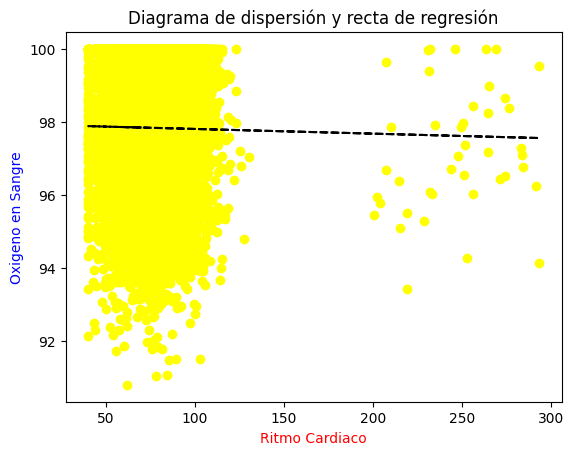

Con un coeficiente de correlación de -0.0142, siendo este un respaldo de nuestra hipotesis que dice que no existe una relación entre ambos datos.

El coeficiente  de determinación es: 0.0002, lo que nos indica que solo el 0.0202% de los datos podrían tener una relación, lo cual es una cantidad insignificativa. 

Intervalo de confianza para b1 de  95%
-0.0032 < b1 <  0.0006

El intervalo de confianza contiene el 0, por lo que  no es un modelo aceptable.


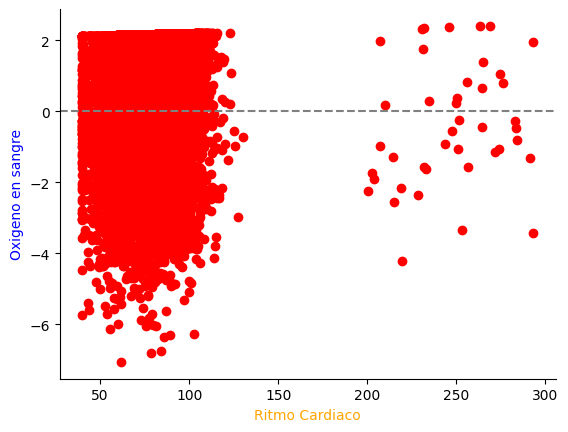

Según el gráfico, no se aprecia una relación lineal clara, si no más bien un cumulo de puntos por ambos lados de la recta al principio y al final algunos puntos dispersos.
Debido a la disperción tan irregular, no es posible confirmar que se siga una tendencia normal.
En el gráfico se observa una concentración en la primera parte de la recta y mucho más disperso al final, ademas de un espacio en blanco entre ambos cumulos, lo que sugiere heterocedasticidad. Por lo que tampoco se cumple el supuesto de homocedasticidad.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/Angelgz011/estadistica2/refs/heads/main/unclean_smartwatch_health_data.csv")
df.dropna(inplace=True)

# Variable independiente X
X = df['Heart Rate (BPM)']

# Variable dependiente Y
Y = df['Blood Oxygen Level (%)']


#B)
# Pasos para obtener la recta de regresión ajustada
#Diagrama de disperción de datos
plt.scatter(X, Y, color = "yellow")
plt.xlabel('Ritmo Cardiaco', color= "red")
plt.ylabel('Oxigeno en Sangre', color = "blue")
plt.title('Diagrama de dispersión y recta de regresión')


# Obtenemos la recta de regresión ajustada con PANDAS
import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()
b0, b1 = modelo.params
fun = lambda x: b0 + b1 * x #Definimos la euación necesaria para la recta
Yc = fun(X)

plt.plot(X, Yc, color = 'black', linestyle = '--') #Graficamos sobre el gráfico de disperción
plt.show()


from scipy.stats import pearsonr
r,_= pearsonr(X,Y)
print(f"Con un coeficiente de correlación de {r:0.4f}, siendo este un respaldo de nuestra hipotesis que dice que no existe una relación entre ambos datos.\n")
r_cuadrado = r**2
print(f"El coeficiente  de determinación es: {r_cuadrado:0.4f}, lo que nos indica que solo el {r_cuadrado*100:0.4f}% de los datos podrían tener una relación, lo cual es una cantidad insignificativa. \n")


nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f"Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}")
print(f"{intervalo_de_confianza_b1[0]:0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n")
print("El intervalo de confianza contiene el 0, por lo que  no es un modelo aceptable.")



residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = "red")
plt.xlabel("Ritmo Cardiaco", color = "orange")
plt.ylabel("Oxigeno en sangre", color = "blue")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline( y = 0, color = "gray", linestyle = "--")
plt.show()
print("Según el gráfico, no se aprecia una relación lineal clara, si no más bien un cumulo de puntos por ambos lados de la recta al principio y al final algunos puntos dispersos.")
print("Debido a la disperción tan irregular, no es posible confirmar que se siga una tendencia normal.")
print("En el gráfico se observa una concentración en la primera parte de la recta y mucho más disperso al final, ademas de un espacio en blanco entre ambos cumulos, lo que sugiere heterocedasticidad. Por lo que tampoco se cumple el supuesto de homocedasticidad.")